In [118]:
import torch
import torchvision.datasets as datasets
from torch.utils.data import DataLoader, Dataset
import torch.nn as nn
import torch.nn.functional as F
from torch import optim
from torchvision import transforms

%matplotlib inline
import matplotlib.pyplot as plt

In [58]:
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

In [106]:
class Flatten(nn.Module):
    def forward(self, x):
        return x.view(x.size()[0], -1)

In [134]:
# simpleNet = nn.Sequential(
#     nn.ReflectionPad2d(1),
#     nn.Conv2d(1, 4, kernel_size=3),
#     nn.ReLU(inplace=True),
#     nn.BatchNorm2d(4),
#     nn.Dropout2d(p=.2),
#     nn.Linear(500, 5)
# )
# simpleNet = nn.Sequential(
#     nn.Conv2d(1, 4, 1),
#     Flatten(),
#     nn.Linear(3136, 10),
#     nn.ReLU(inplace=True),
#     nn.Softmax(dim=1)
# )
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)
simpleNet = Net()

data_loader_test = DataLoader(mnist_testset, 64)
data_loader_train = DataLoader(mnist_trainset, 64)
criterion = F.nll_loss
optimizer = optim.Adam(simpleNet.parameters(), lr=0.05)

In [136]:
losses = []
for epoch in range(10):
    for i, (x, y) in enumerate(data_loader_train):
        y_hat = simpleNet(x)
        loss = criterion(y_hat, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if i%100 == 0:
            losses.append(loss.item())
    
    

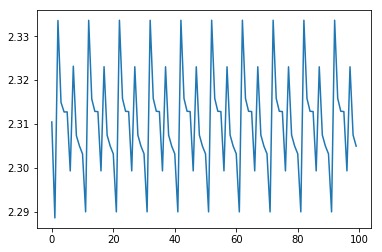

In [137]:
x_data = [i for i in range(len(losses))]
plt.plot(x_data, losses)